In [1]:
import pandas as pd
import numpy as np
import importlib

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.getcwd() + "\\..\\src")

Read in control sheets

In [2]:
control_sheet_cat = pd.read_csv("..//controls/Housing_Categorical_ControlSheet.csv")
control_sheet_cat

,FeatureName,TransformedName,Include,Raw,Categorical,Categorical_Level_Number,Categorical_Encoding,Categorical_Ordering,Missing_Values,Shadow_Col,Impute_Strategy,Impute_Value
0,Id,Id,N,Y,Y,100.0,NaN,NaN,-1; -2,N,NaN,NaN
1,MSZoning,MSZoning,Y,Y,Y,NaN,ordinal,C (all); I; A; FV; RP; RL; RM; RH,NaN,N,constant,Unknown
2,Street,Street,Y,Y,Y,NaN,ordinal,NaN,NaN,N,most_frequent,NaN
3,Alley,Alley,Y,Y,Y,NaN,ordinal,NaN,NaN,N,constant,Unknown
4,LotShape,LotShape,Y,Y,Y,NaN,ordinal,Reg; IR1; IR2; IR3,NaN,N,constant,Unknown
5,LandContour,LandContour,N,Y,Y,NaN,ordinal,Lvl; Bnk; HLS; Low,NaN,N,constant,Unknown
6,Utilities,Utilities,N,Y,Y,NaN,NaN,NaN,NaN,N,constant,Unknown
7,LotConfig,LotConfig,Y,Y,Y,3.0,one_hot,NaN,NaN,N,constant,Unknown
8,LandSlope,LandSlope,Y,Y,Y,NaN,ordinal,Gtl; Mod; Sev,NaN,N,constant,Unknown
9,Neighborhood,Neighborhood,Y,Y,Y,5.0,frequency,NaN,NAmes,N,constant,Unknown


In [3]:
control_sheet_num = pd.read_csv("..//controls/Housing_Numeric_ControlSheet.csv")
control_sheet_num

,FeatureName,TransformedName,Include,Raw,Numeric,Numeric_Unk_Min,Numeric_Cap_Min,Numeric_Cap_Max,Numeric_Unk_Max,Missing_Values,Shadow_Col,Impute_Strategy,Impute_Value
0,Id,Id,N,Y,Y,NaN,NaN,NaN,NaN,-1; -2,N,median,NaN
1,MSSubClass,MSSubClass,Y,Y,Y,19.0,NaN,NaN,191.0,NaN,Y,median,NaN
2,LotFrontage,LotFrontage,Y,Y,Y,0.0,10.0,175.0,1000.0,NaN,Y,median,NaN
3,LotArea,LotArea,Y,Y,Y,0.0,10.0,30000.0,NaN,NaN,Y,constant,10.0
4,OverallQual,OverallQual,Y,Y,Y,0.0,NaN,NaN,11.0,NaN,Y,median,NaN
5,OverallCond,OverallCond,Y,Y,Y,0.0,NaN,NaN,11.0,NaN,Y,median,NaN
6,YearBuilt,YearBuilt,Y,Y,Y,1500.0,1800.0,2020.0,2020.0,NaN,Y,median,NaN
7,YearRemodAdd,YearRemodAdd,Y,Y,Y,1500.0,1800.0,2020.0,2020.0,NaN,Y,median,NaN
8,MasVnrArea,MasVnrArea,Y,Y,Y,0.0,0.0,1000.0,NaN,0,Y,constant,0.0
9,BsmtFinSF1,BsmtFinSF1,Y,Y,Y,0.0,0.0,3000.0,10000.0,0,Y,constant,0.0


Read in house price data

In [4]:
hp_train = pd.read_csv("..\\data\\raw\\HousePrices_train.csv")
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Extracting the target

In [5]:
y_train = hp_train["SalePrice"]

# Set Variable Transformation

Build the two column transformer pipelines

In [6]:
from construction.BuildCategoricalPipeline import BuildCategoricalPipeline
importlib.reload(sys.modules[BuildCategoricalPipeline.__module__])

from construction.BuildNumericPipeline import BuildNumericPipeline
importlib.reload(sys.modules[BuildNumericPipeline.__module__])

from transformers.names_from_ColumnTransformer import names_from_ColumnTransformer
importlib.reload(sys.modules[names_from_ColumnTransformer.__module__])

<module 'transformers.names_from_ColumnTransformer' from 'c:\\Users\\User\\Documents\\User\\Work\\Admiral\\Pipeline_Builder\\pipelineconstruction\\notebooks\\..\\src\\transformers\\names_from_ColumnTransformer.py'>

In [7]:
cat_trans_list = BuildCategoricalPipeline(control_sheet_cat)

In [8]:
num_trans_list = BuildNumericPipeline(control_sheet_num)

Join the two column treatments together

In [9]:
col_trans_list = cat_trans_list + num_trans_list

Build a column transformer

In [10]:
from sklearn.compose import ColumnTransformer

In [11]:
trans_house_price = ColumnTransformer(col_trans_list)

test the transformation works

In [12]:
hp_train_trans = trans_house_price.fit_transform(hp_train)
hp_train_trans_df = pd.DataFrame(hp_train_trans, columns=names_from_ColumnTransformer(trans_house_price))
hp_train_trans_df.head()

,MSZoning,Street,Alley,LotShape,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LotConfig_other,LandSlope,Neighborhood,...,OverallCond,OverallCond_NA,YearBuilt,YearBuilt_NA,YearRemodAdd,YearRemodAdd_NA,MasVnrArea,MasVnrArea_NA,BsmtFinSF1,BsmtFinSF1_NA
0,6.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,5.0,0.0,2003.0,0.0,2003.0,0.0,196.0,0.0,706.0,0.0
1,6.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,...,8.0,0.0,1976.0,0.0,1976.0,0.0,0.0,0.0,978.0,0.0
2,6.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,...,5.0,0.0,2001.0,0.0,2002.0,0.0,162.0,0.0,486.0,0.0
3,6.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,5.0,...,5.0,0.0,1915.0,0.0,1970.0,0.0,0.0,0.0,216.0,0.0
4,6.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,5.0,...,5.0,0.0,2000.0,0.0,2000.0,0.0,350.0,0.0,655.0,0.0


# Build Model

Building a rough and ready model

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [14]:
RF_Reg = RandomForestRegressor() # Use defaults as we're not trying to do a good job

RF_pipeline = Pipeline([("trans", trans_house_price), ("Reg",RF_Reg)])

RF_pipeline.fit(hp_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('MSZoning',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OrdinalEncoder(categories=[['Unknown',
                                                                                               'C '
                                                                                               '(all)',
                                                                                               'I',
                                                                                               'A',
                                         

Testing that we can predict

In [15]:
y_pred = RF_pipeline.predict(hp_train)
y_pred

array([207653.5 , 177881.  , 217860.65, ..., 243339.19, 133976.75,
       144364.  ])

In [16]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_pred)

8276.657523255055

We now have a (not very good model).

# Shap

importing shap

In [17]:
import shap

training the shap method

In [21]:
explainer = shap.TreeExplainer(RF_pipeline["Reg"])
shap_values = explainer.shap_values(RF_pipeline["trans"].transform(hp_train))

which allows us to produce plots

Such as dependence plots for individual factors

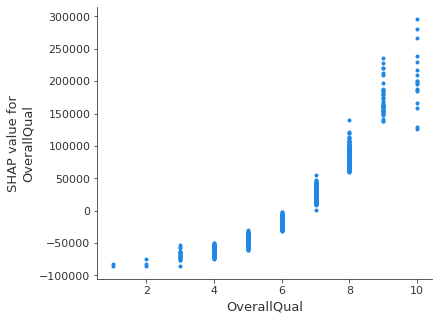

In [31]:
shap.dependence_plot("OverallQual", shap_values, hp_train_trans_df, interaction_index=None)

or different types of feature importants plots

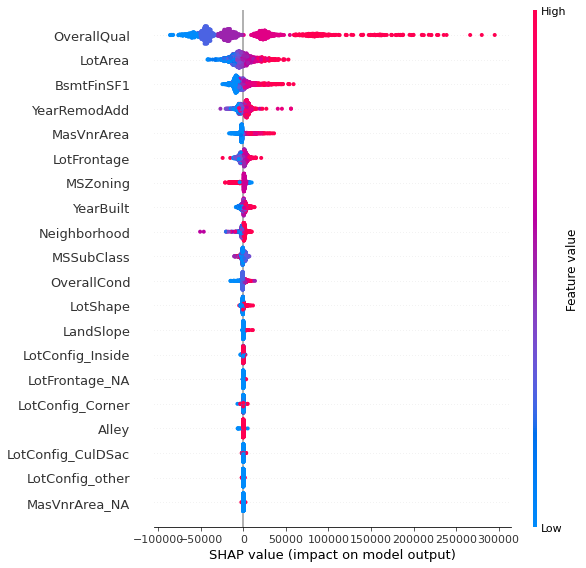

In [32]:
shap.summary_plot(shap_values, hp_train_trans_df)

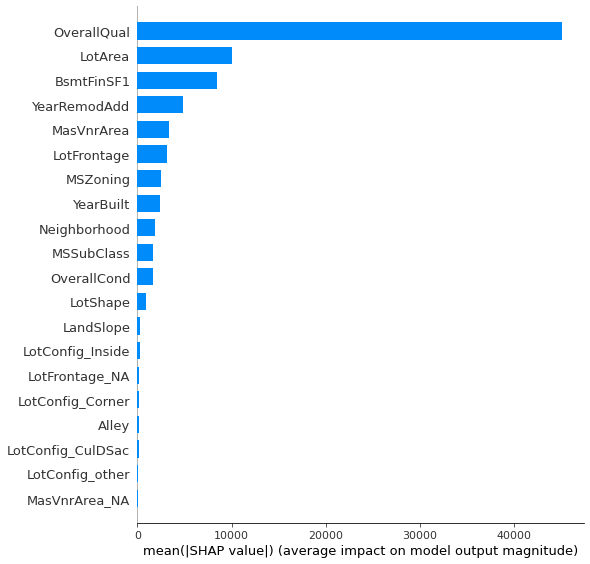

In [35]:
shap.summary_plot(shap_values, hp_train_trans_df, plot_type="bar")